In [46]:
import pandas as pd
import matplotlib.pyplot as plt


In [47]:


songsRawData = pd.read_csv('Data\ml-03-data-processing-songs-dataset.csv')


In [48]:
print(songsRawData.describe())


             Index         Year  Beats Per Minute (BPM)       Energy  \
count  1994.000000  1987.000000             1985.000000  1986.000000   
mean    997.500000  1959.526422              120.230730    59.664149   
std     575.762538   250.650856               28.625839    22.159565   
min       1.000000    92.000000               15.000000     3.000000   
25%     499.250000  1978.000000               99.000000    42.000000   
50%     997.500000  1993.000000              119.000000    61.000000   
75%    1495.750000  2007.000000              136.000000    78.000000   
max    1994.000000  2019.000000              305.000000   100.000000   

       Danceability  Loudness (dB)     Liveness     Valence  Acousticness  \
count    970.000000    1987.000000  1986.000000  960.000000   1986.000000   
mean      52.983505      -9.009562    19.013092   50.820833     28.897281   
std       15.426169       3.652092    16.739697   24.955125     29.020822   
min       10.000000     -27.000000     2.00

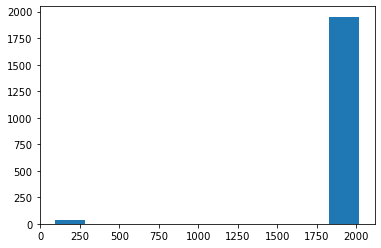

In [49]:
songsData = songsRawData.copy()
songsData['Year'] = pd.to_numeric(songsData['Year'])
plt.hist(songsData['Year'])
plt.show()


The Year has outlier data that are likely incorrectly entered. The minimum value of 92 may have been a miss-entry for 1992. There may be other similar outliers to handle. 

In [50]:
print(songsData[songsData['Year'] < 1900][['Title', 'Artist', 'Year']])


                                                  Title  \
1567                                Killing In The Name   
1568                   Fear of the Dark - 2015 Remaster   
1569                                       Bed Of Roses   
1570                                    Everybody Hurts   
1571                                           Kayleigh   
1572  Layla - Acoustic; Live at MTV Unplugged, Bray ...   
1573                             I Will Always Love You   
1574                                      Nightswimming   
1575                               Conquest of Paradise   
1576                                             Would?   
1577                                 Friday I'm in Love   
1578                                  Sharp Dressed Man   
1579                                    Man On The Moon   
1580                              Gimme All Your Lovin'   
1581                                         What's Up?   
1582                                           Lavender 

Googling some of the songs on the list indicate that they were either released or rereleased in 1992. The outliers can be replaced with 1992.

             Index         Year  Beats Per Minute (BPM)       Energy  \
count  1994.000000  1987.000000             1985.000000  1986.000000   
mean    997.500000  1992.993961              120.230730    59.664149   
std     575.762538    16.111644               28.625839    22.159565   
min       1.000000  1956.000000               15.000000     3.000000   
25%     499.250000  1979.000000               99.000000    42.000000   
50%     997.500000  1993.000000              119.000000    61.000000   
75%    1495.750000  2007.000000              136.000000    78.000000   
max    1994.000000  2019.000000              305.000000   100.000000   

       Danceability  Loudness (dB)     Liveness     Valence  Acousticness  \
count    970.000000    1987.000000  1986.000000  960.000000   1986.000000   
mean      52.983505      -9.009562    19.013092   50.820833     28.897281   
std       15.426169       3.652092    16.739697   24.955125     29.020822   
min       10.000000     -27.000000     2.00

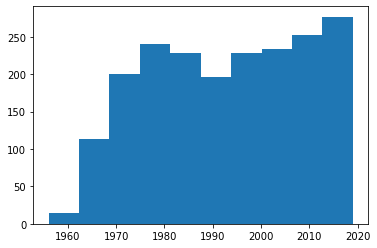

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1994 non-null   int64  
 1   Title                   1991 non-null   object 
 2   Artist                  1986 non-null   object 
 3   Top Genre               1986 non-null   object 
 4   Year                    1987 non-null   float64
 5   Month                   1994 non-null   object 
 6   Beats Per Minute (BPM)  1985 non-null   float64
 7   Energy                  1986 non-null   float64
 8   Danceability            970 non-null    float64
 9   Loudness (dB)           1987 non-null   float64
 10  Liveness                1986 non-null   float64
 11  Valence                 960 non-null    float64
 12  Length (Duration)       1985 non-null   object 
 13  Acousticness            1986 non-null   float64
 14  Speechiness             1990 non-null   

In [51]:
songsData['Year'] = songsData['Year'].replace(92, 1992)
print(songsData.describe())
plt.hist(songsData['Year'])
plt.show()
print(songsData.info())

There is something weird with the Length column in that it is an object.

In [52]:
print(songsData['Length (Duration)'].unique)
# Check if all are Numeric
for idx, row in songsData.iterrows():
    try: 
        test = pd.to_numeric(row['Length (Duration)'])
    except: 
        print(f"Bad Length: {row['Length (Duration)']}")

# There are commas messing things up in our conversion function
# so, remove the commas and try converting again. (Use to_numeric because of NaNs)
songsData['Length (Duration)'] = songsData['Length (Duration)'].str.replace(',', '')
# Check if all are Numeric
for idx, row in songsData.iterrows():
    try:
        row['Length (Duration)'] = pd.to_numeric(row['Length (Duration)'])
    except:
        print(f"Bad Length: {row['Length (Duration)']}")
# Change the dtype for the column now that all the values are fixed
songsData['Length (Duration)'] = songsData['Length (Duration)'].astype(float)
print(songsData['Length (Duration)'].unique)


<bound method Series.unique of 0       201
1       207
2       341
3       269
4       256
       ... 
1989    128
1990    136
1991    162
1992    324
1993    148
Name: Length (Duration), Length: 1994, dtype: object>
Bad Length: 1,412
Bad Length: 1,121
Bad Length: 1,367
Bad Length: 1,292
<bound method Series.unique of 0       201.0
1       207.0
2       341.0
3       269.0
4       256.0
        ...  
1989    128.0
1990    136.0
1991    162.0
1992    324.0
1993    148.0
Name: Length (Duration), Length: 1994, dtype: float64>


2. There are 1994 observations but many of the columns have a lot of missing values. In particular, Daceability and Valence. Title, Artist, Genre, Month, and Length are non-numeric types. Remove all rows that have over half the values missing.

In [53]:

songsData.dropna(thresh=len(songsData.axes[1])/2, axis=0, inplace=True)
print(songsData.info())
songsData[songsData['Artist'].isna()]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1993
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1987 non-null   int64  
 1   Title                   1987 non-null   object 
 2   Artist                  1984 non-null   object 
 3   Top Genre               1983 non-null   object 
 4   Year                    1984 non-null   float64
 5   Month                   1987 non-null   object 
 6   Beats Per Minute (BPM)  1983 non-null   float64
 7   Energy                  1983 non-null   float64
 8   Danceability            970 non-null    float64
 9   Loudness (dB)           1983 non-null   float64
 10  Liveness                1983 non-null   float64
 11  Valence                 960 non-null    float64
 12  Length (Duration)       1982 non-null   float64
 13  Acousticness            1984 non-null   float64
 14  Speechiness             1986 non-null   

,Index,Title,Artist,Top Genre,Year,Month,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
886,887,Starman - 2012 Remaster,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,54.0,NaN,254.0,17.0,3.0,74.0
1109,1110,Fire,NaN,dance pop,1978.0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,3.0,56.0
1887,1888,Respect,NaN,NaN,NaN,9,NaN,NaN,NaN,-5.0,5.0,NaN,NaN,16.0,4.0,73.0


This removed ten rows from the dataframe that were missing most of their values. Do the same thing for the columns.


In [54]:

songsData.dropna(thresh=len(songsData.axes[0])/2+1, axis=1, inplace=True)
print(songsData.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1987 non-null   int64  
 1   Title                   1987 non-null   object 
 2   Artist                  1984 non-null   object 
 3   Top Genre               1983 non-null   object 
 4   Year                    1984 non-null   float64
 5   Month                   1987 non-null   object 
 6   Beats Per Minute (BPM)  1983 non-null   float64
 7   Energy                  1983 non-null   float64
 8   Loudness (dB)           1983 non-null   float64
 9   Liveness                1983 non-null   float64
 10  Length (Duration)       1982 non-null   float64
 11  Acousticness            1984 non-null   float64
 12  Speechiness             1986 non-null   float64
 13  Popularity              1985 non-null   float64
dtypes: float64(9), int64(1), object(4)
memor

This removed 3 columns

3. Calculate descriptive statistics for each column. Let's define an outlier as a value at least 3 standard deviations away from the mean. Which columns have outliers? What are those values?

In [55]:
# loop through all of the columns of type float64. Need to do to avoid failure
# when trying to evaluate strings.
for name, values in songsData.select_dtypes('float64').iteritems():
    mean = pd.Series.mean(values)
    stddev = pd.Series.std(values)
    upper = mean + 3*stddev
    lower = mean - 3*stddev
    print(name)
    print(f"Mean/Std Dev: {mean}, {stddev}")
    print(f"Upper/Lower: {upper} to {lower}")
    OutOfBounds = []
    for idx, value in enumerate(values):
        # If we have outliers add them to the list to print
        # Also, do a winsorizing by setting them to the nearest boundary. 
        if not pd.isna(value):
            if (value > upper):
                OutOfBounds.append(value)
                songsData[name].iloc[idx] = upper
            elif (value < lower):
                OutOfBounds.append(value)
                songsData[name].iloc[idx] = lower

    print(f"Outliers: {OutOfBounds}")
print(pd.Series.mean(songsData['Beats Per Minute (BPM)']))
print(pd.Series.std(songsData['Beats Per Minute (BPM)']))




Year
Mean/Std Dev: 1992.9863911290322, 16.112980965757565
Upper/Lower: 2041.325334026305 to 1944.6474482317594
Outliers: []
Beats Per Minute (BPM)
Mean/Std Dev: 120.23449319213313, 28.63992295757747
Upper/Lower: 206.15426206486552 to 34.314724319400725
Outliers: [18.0, 305.0, 15.0, 297.0]
Energy
Mean/Std Dev: 59.6535552193646, 22.170413649509676
Upper/Lower: 126.16479616789363 to -6.857685729164437
Outliers: []
Loudness (dB)
Mean/Std Dev: -9.013615733736762, 3.653139062875775
Upper/Lower: 1.9458014548905638 to -19.973032922364087
Outliers: [-21.0, -20.0, -22.0, -22.0, -20.0, -20.0, -24.0, -20.0, -21.0, -22.0, -24.0, -27.0, -21.0, -21.0, -22.0, -21.0, -21.0, -20.0, -21.0, -22.0, -22.0, -21.0]
Liveness
Mean/Std Dev: 19.019667170953102, 16.75041203132442
Upper/Lower: 69.27090326492636 to -31.23156892302016
Outliers: [81.0, 70.0, 93.0, 79.0, 70.0, 97.0, 70.0, 83.0, 72.0, 97.0, 97.0, 87.0, 96.0, 71.0, 99.0, 92.0, 78.0, 95.0, 71.0, 90.0, 81.0, 95.0, 87.0, 91.0, 85.0, 89.0, 76.0, 73.0, 72.0, 

D:\Users\Darrell\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Acousticness
Mean/Std Dev: 28.916834677419356, 29.02880199553372
Upper/Lower: 116.00324066402052 to -58.169571309181805
Outliers: []
Speechiness
Mean/Std Dev: 4.991440080563947, 4.407050367050247
Upper/Lower: 18.21259118171469 to -8.229711020586794
Outliers: [25.0, 26.0, 30.0, 23.0, 24.0, 19.0, 24.0, 20.0, 39.0, 23.0, 20.0, 19.0, 32.0, 19.0, 24.0, 44.0, 30.0, 24.0, 25.0, 31.0, 20.0, 46.0, 38.0, 55.0, 22.0, 23.0, 32.0, 36.0, 19.0, 31.0, 26.0, 28.0, 30.0, 20.0, 30.0, 29.0, 31.0, 19.0, 27.0, 32.0, 39.0, 41.0]
Popularity
Mean/Std Dev: 59.51183879093199, 14.366704685570326
Upper/Lower: 102.61195284764297 to 16.41172473422101
Outliers: [16.0, 14.0, 15.0, 13.0, 16.0, 16.0, 15.0, 12.0, 11.0]
120.15680180169872
28.129837097634844


4. With the remaining columns, use scikit-learn to impute missing values. For continuous features, fill in the mean. For categorical features, fill in the mode.

In [56]:
# Remember what types the columns are
print(songsData.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1987 non-null   int64  
 1   Title                   1987 non-null   object 
 2   Artist                  1984 non-null   object 
 3   Top Genre               1983 non-null   object 
 4   Year                    1984 non-null   float64
 5   Month                   1987 non-null   object 
 6   Beats Per Minute (BPM)  1983 non-null   float64
 7   Energy                  1983 non-null   float64
 8   Loudness (dB)           1983 non-null   float64
 9   Liveness                1983 non-null   float64
 10  Length (Duration)       1982 non-null   float64
 11  Acousticness            1984 non-null   float64
 12  Speechiness             1986 non-null   float64
 13  Popularity              1985 non-null   float64
dtypes: float64(9), int64(1), object(4)
memor

In [57]:
from sklearn.impute import SimpleImputer
import numpy as np

## Impute the numerical values to the mean
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
for name, values in songsData.select_dtypes('float64').iteritems():
    songsData[name] = imp_mean.fit_transform(
        songsData[name].to_numpy().reshape(-1, 1))

print(songsData.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1987 non-null   int64  
 1   Title                   1987 non-null   object 
 2   Artist                  1984 non-null   object 
 3   Top Genre               1983 non-null   object 
 4   Year                    1987 non-null   float64
 5   Month                   1987 non-null   object 
 6   Beats Per Minute (BPM)  1987 non-null   float64
 7   Energy                  1987 non-null   float64
 8   Loudness (dB)           1987 non-null   float64
 9   Liveness                1987 non-null   float64
 10  Length (Duration)       1987 non-null   float64
 11  Acousticness            1987 non-null   float64
 12  Speechiness             1987 non-null   float64
 13  Popularity              1987 non-null   float64
dtypes: float64(9), int64(1), object(4)
memor

In [58]:
## Impute the categorical values to the mode
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for name, values in songsData.select_dtypes('object').iteritems():
    songsData[name] = imp_mean.fit_transform(
        songsData[name].to_numpy().reshape(-1, 1))

print(songsData.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1987 non-null   int64  
 1   Title                   1987 non-null   object 
 2   Artist                  1987 non-null   object 
 3   Top Genre               1987 non-null   object 
 4   Year                    1987 non-null   float64
 5   Month                   1987 non-null   object 
 6   Beats Per Minute (BPM)  1987 non-null   float64
 7   Energy                  1987 non-null   float64
 8   Loudness (dB)           1987 non-null   float64
 9   Liveness                1987 non-null   float64
 10  Length (Duration)       1987 non-null   float64
 11  Acousticness            1987 non-null   float64
 12  Speechiness             1987 non-null   float64
 13  Popularity              1987 non-null   float64
dtypes: float64(9), int64(1), object(4)
memor

5. Combine the date-related columns into one column with the Pandas to_datetime() method, then use that column to create a numeric Age column (in years). Calculate Age based on today's date; it doesn't have to be a whole number. Once you've created the Age column, remove the other date-related columns, including the one you created with Pandas.

In [59]:
songsData['Month'].unique()

array(['10', '3', '6', '1', '8', '2', '9', '12', '11', '4', '7', '5',
       'Jan', 'Dec', 'Sep', 'Apr', 'Jun', 'May'], dtype=object)

The month column is string object and contains a mixture of numeric values and short month names. We need to pull out the short month names and convert to numeric.

In [60]:
import calendar 
MonthAbbr = list(calendar.month_abbr)
for abbr in MonthAbbr:
    songsData['Month'].replace(abbr, MonthAbbr.index(abbr), inplace=True)
songsData['Month'].unique()



array(['10', '3', '6', '1', '8', '2', '9', '12', '11', '4', '7', '5', 1,
       12, 9, 4, 6, 5], dtype=object)

In [61]:
songsData['Month'] = songsData['Month'].astype(str)
songsData['Year'] = songsData['Year'].astype(int).astype(str)
songsData.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1987 non-null   int64  
 1   Title                   1987 non-null   object 
 2   Artist                  1987 non-null   object 
 3   Top Genre               1987 non-null   object 
 4   Year                    1987 non-null   object 
 5   Month                   1987 non-null   object 
 6   Beats Per Minute (BPM)  1987 non-null   float64
 7   Energy                  1987 non-null   float64
 8   Loudness (dB)           1987 non-null   float64
 9   Liveness                1987 non-null   float64
 10  Length (Duration)       1987 non-null   float64
 11  Acousticness            1987 non-null   float64
 12  Speechiness             1987 non-null   float64
 13  Popularity              1987 non-null   float64
dtypes: float64(8), int64(1), object(5)
memor

Now, we can combine the month and year into a datatime object and put in another column.

In [62]:
songsData['YearMonth'] = pd.to_datetime(songsData['Year'] + ' '+ songsData['Month'])
songsData['YearMonth'].head()

0   2004-10-01
1   2000-03-01
2   2001-06-01
3   2007-01-01
4   2002-08-01
Name: YearMonth, dtype: datetime64[ns]

Calculate the age based on the year/month of release and add to an Age column. This is an integer age without fractional values. 

In [63]:
now = pd.to_datetime('now')
songsData['Age'] = (now - songsData['YearMonth']).astype('<m8[Y]').astype(int)
print(songsData['Age'])


0       17
1       21
2       20
3       15
4       19
        ..
1989    63
1990    63
1991    62
1992    62
1993    62
Name: Age, Length: 1987, dtype: int32


In [64]:
songsData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1993
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Index                   1987 non-null   int64         
 1   Title                   1987 non-null   object        
 2   Artist                  1987 non-null   object        
 3   Top Genre               1987 non-null   object        
 4   Year                    1987 non-null   object        
 5   Month                   1987 non-null   object        
 6   Beats Per Minute (BPM)  1987 non-null   float64       
 7   Energy                  1987 non-null   float64       
 8   Loudness (dB)           1987 non-null   float64       
 9   Liveness                1987 non-null   float64       
 10  Length (Duration)       1987 non-null   float64       
 11  Acousticness            1987 non-null   float64       
 12  Speechiness             1987 non-null   float64 

Remove the other date columns leaving only age

In [65]:
songsData.drop(['Year','Month','YearMonth'], axis = 1, inplace=True)
songsData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1993
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1987 non-null   int64  
 1   Title                   1987 non-null   object 
 2   Artist                  1987 non-null   object 
 3   Top Genre               1987 non-null   object 
 4   Beats Per Minute (BPM)  1987 non-null   float64
 5   Energy                  1987 non-null   float64
 6   Loudness (dB)           1987 non-null   float64
 7   Liveness                1987 non-null   float64
 8   Length (Duration)       1987 non-null   float64
 9   Acousticness            1987 non-null   float64
 10  Speechiness             1987 non-null   float64
 11  Popularity              1987 non-null   float64
 12  Age                     1987 non-null   int32  
dtypes: float64(8), int32(1), int64(1), object(3)
memory usage: 209.6+ KB


6. Create dummy variables for the categorical features. Drop one level of each feature to end up with k-1 dummies, not k.

In [66]:
songsData = pd.get_dummies(songsData, drop_first=True)
print(songsData.shape)
songsData.head()

(1987, 2836)


,Index,Beats Per Minute (BPM),Energy,Loudness (dB),Liveness,Length (Duration),Acousticness,Speechiness,Popularity,Age,...,Top Genre_reggae,Top Genre_reggae fusion,Top Genre_rock-and-roll,Top Genre_scottish singer-songwriter,Top Genre_soft rock,Top Genre_stomp and holler,Top Genre_streektaal,Top Genre_trance,Top Genre_uk pop,Top Genre_yacht rock
0,1,157.0,30.0,-14.0,11.0,201.0,94.0,3.0,71.0,17,...,0,0,0,0,0,0,0,0,0,0
1,2,135.0,79.0,-11.0,17.0,207.0,17.0,7.0,39.0,21,...,0,0,0,0,0,0,0,0,0,0
2,3,168.0,69.0,-9.0,7.0,341.0,2.0,17.0,69.0,20,...,0,0,0,0,0,0,0,0,0,0
3,4,173.0,96.0,-4.0,3.0,269.0,0.0,4.0,76.0,15,...,0,0,0,0,0,0,0,0,0,0
4,5,106.0,82.0,-5.0,10.0,256.0,1.0,3.0,59.0,19,...,0,0,0,0,0,0,0,0,0,0


In [68]:
# Clean up a bit and export
songsData.drop('Index', axis=1, inplace=True)
songsData.reset_index(drop=True, inplace=True)
songsData.to_csv('Data/M03DataProcessingClean.csv')
